# Section 2.2.3: Large dimensional sample covariance matrices and deformed semi-circles

This page contains simulations in Section 2.2.3.

## Contents

    - Large dimensional sample covariance matrix (Theorem 2.5)
    - The bi-correlated model (Theorem 2.6)
    - Sample covariance of $k$-class mixture models (Theorem 2.7)
    - The deformed semi-circle law (Theorem 2.8)

## Large dimensional sample covariance matrix (Theorem 2.5)

Generate a (Gaussian i.i.d.) random matrix $Z$ of dimension $p \times n$ Generate the associated data matrix 

In [53]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
pi = np.pi

In [54]:
coeff = 3
p = 100*coeff
n = 1000*coeff
c = p/n

eigs_C = np.concatenate([np.ones(p//3),3*np.ones(p//3),7*np.ones(p//3)]) #eigs_C = [1,..,3,...,5...]
C = np.mat(np.diag(eigs_C)) # population covariance

np.random.seed(928)
Z = np.mat(np.random.randn(p,n))
X = scipy.linalg.sqrtm(C)*Z

Empirical eigenvalues of the sample covariance matrix $\frac1n X X^T = \frac1n C^{\frac12} Z Z^T C ^{\frac12}$ versus the solution of fixed-point equation in Theorem 2.5

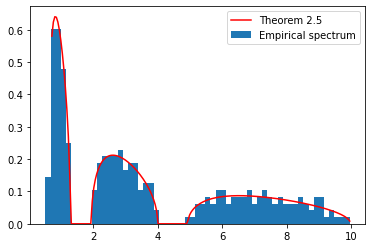

In [58]:
Tol = 1e-1
SCM = X@X.T/n
eigs_SCM = np.linalg.eig(SCM)[0]
edges    = np.linspace(np.min(eigs_SCM)-Tol,np.max(eigs_SCM)+Tol,60)
edges_mu = np.linspace(np.min(eigs_SCM)+Tol,np.max(eigs_SCM)+Tol,200)

y = 1e-5
zs = edges_mu+y*1j
mu = []

tilde_m=0
for z in zs:

    tilde_m_tmp=-1
    while abs(tilde_m-tilde_m_tmp)>1e-6:
        tilde_m_tmp=tilde_m
        tilde_m = 1/( -z + 1/n*np.sum(eigs_C/(1+tilde_m*eigs_C)) )

    m = tilde_m/c+(1-c)/(c*z)
    mu.append(np.imag(m)/pi)

plt.hist(eigs_SCM,bins=edges,weights=1/p/(edges[1]-edges[0])*np.ones(p),label='Empirical spectrum')
plt.plot(edges_mu,mu,'r',label='Theorem 2.5')
_ = plt.legend()